<a href="https://colab.research.google.com/github/nishantkj911/deepLearningModels/blob/updates/First_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install --upgrade matplotlib tensorflow_datasets

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.1.1)
Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.1.0)


# Importing all important libraries

In [0]:
import tensorflow_datasets as tfds # 1.14 stable version
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [0]:
# Load the model and split it into train and test sets.
model_data, model_info = tfds.load("mnist", with_info = True)
train_data, test_data = model_data["train"], model_data["test"]

W0818 14:29:50.906724 140180754171776 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
print(model_data["test"])
print(model_data["train"])
model_info

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [0]:
# i = tf.data.make_one_shot_iterator(train_data)
# item = i.get_next()
# img = item["image"]
# img = tf.reshape(img, [28, 28])
# print(item)
# print(img)
# with tf.Session() as sess:
#     result = sess.run(img)
#     plt.imshow(result)
#     plt.show()
#     print(sess.run(item['label']))

{'image': <class 'tensorflow.python.framework.ops.Tensor'>, 'label': <class 'tensorflow.python.framework.ops.Tensor'>}
{'image': TensorShape([Dimension(28), Dimension(28), Dimension(1)]), 'label': TensorShape([])}


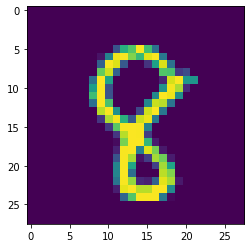

Tensor("IteratorGetNext_175:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_175:1", shape=(), dtype=int64)
7


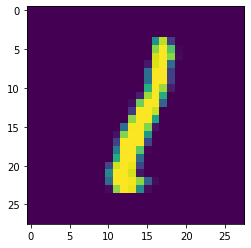

Tensor("IteratorGetNext_176:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_176:1", shape=(), dtype=int64)
9


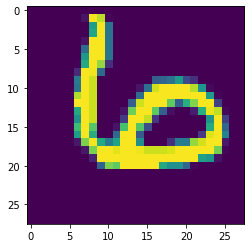

Tensor("IteratorGetNext_177:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_177:1", shape=(), dtype=int64)
0


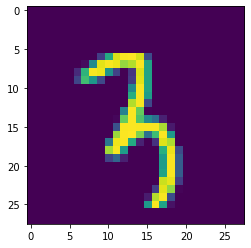

Tensor("IteratorGetNext_178:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_178:1", shape=(), dtype=int64)
4


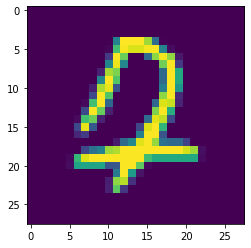

Tensor("IteratorGetNext_179:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_179:1", shape=(), dtype=int64)
8


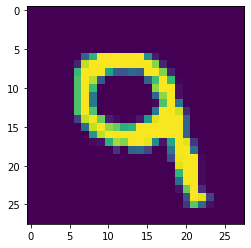

Tensor("IteratorGetNext_180:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_180:1", shape=(), dtype=int64)
3


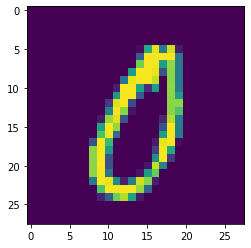

Tensor("IteratorGetNext_181:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_181:1", shape=(), dtype=int64)
4


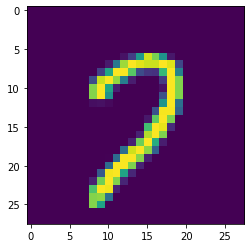

Tensor("IteratorGetNext_182:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_182:1", shape=(), dtype=int64)
7


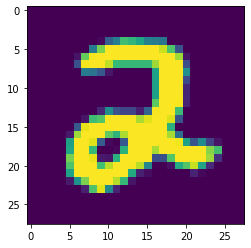

Tensor("IteratorGetNext_183:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_183:1", shape=(), dtype=int64)
1


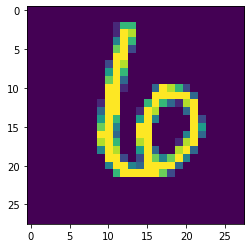

Tensor("IteratorGetNext_184:0", shape=(28, 28, 1), dtype=uint8) Tensor("IteratorGetNext_184:1", shape=(), dtype=int64)
4


In [0]:
def iterateThroughDataset(sess, data):
    one_shot_iter = tf.data.make_one_shot_iterator(data)
    for _ in range(0, 10):
        item = one_shot_iter.get_next()
        img, label = item['image'], item['label']
        resize_img = tf.reshape(img, [28,28])
        plt.imshow(sess.run(resize_img))
        plt.show()
        print(img, label)
        print(sess.run(label))
        
# print(tf.data.get_output_classes(train_data))
# print(tf.data.get_output_shapes(train_data))
with tf.Session() as sess:
    iterateThroughDataset(sess, train_data)